
# Mini-Projet : Classification binaire de textes (IMDB)


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import imdb


/Users/leamariani/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:

# On garde uniquement les 10 000 mots les plus fréquents
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

print("Nombre d'exemples dans le training set :", len(x_train))
print("Nombre d'exemples dans le test set :", len(x_test))
print("Exemple d'avis encodé :", x_train[0][:10])


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Nombre d'exemples dans le training set : 25000
Nombre d'exemples dans le test set : 25000
Exemple d'avis encodé : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]


In [3]:

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1
    return results

x_train_vec = vectorize_sequences(x_train)
x_test_vec = vectorize_sequences(x_test)

print("Forme des données vectorisées :", x_train_vec.shape)


Forme des données vectorisées : (25000, 10000)


In [4]:

x_val = x_train_vec[:10000]
partial_x_train = x_train_vec[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [7]:

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [6]:

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7037 - loss: 0.5972 - val_accuracy: 0.8643 - val_loss: 0.4070
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8896 - loss: 0.3502 - val_accuracy: 0.8654 - val_loss: 0.3430
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9158 - loss: 0.2643 - val_accuracy: 0.8878 - val_loss: 0.2912
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9322 - loss: 0.2108 - val_accuracy: 0.8861 - val_loss: 0.2831
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9439 - loss: 0.1765 - val_accuracy: 0.8831 - val_loss: 0.2893
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9520 - loss: 0.1504 - val_accuracy: 0.8860 - val_loss: 0.2819
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9575 - loss: 0.1323 - val_accuracy: 0.8760 - val_loss: 0.3309
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9645 - loss: 0.1152 - val_accuracy: 0.8850 - val_los

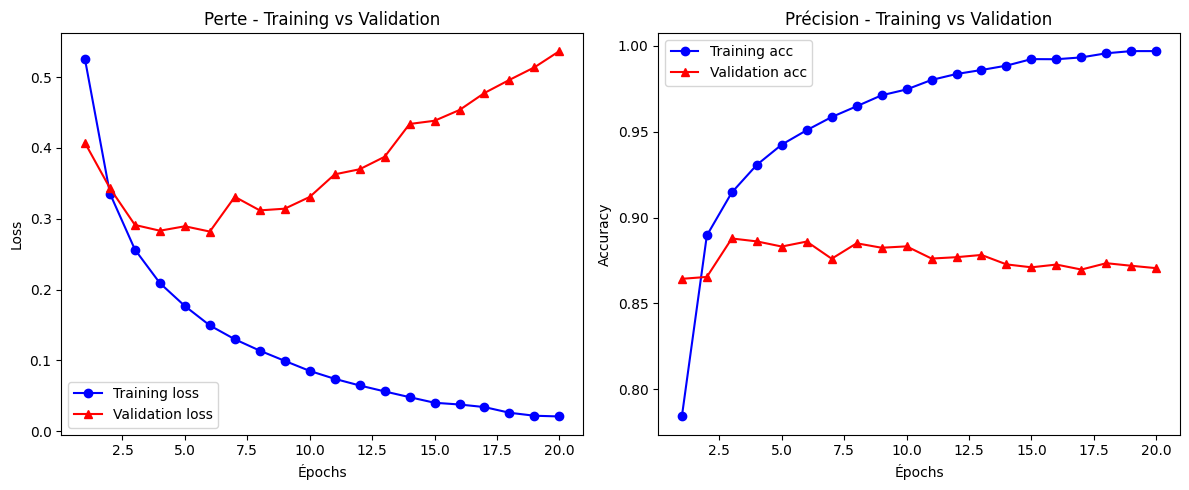

In [8]:

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

# Perte
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo-', label='Training loss')
plt.plot(epochs, val_loss_values, 'r^-', label='Validation loss')
plt.title('Perte - Training vs Validation')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()

# Précision
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'r^-', label='Validation acc')
plt.title('Précision - Training vs Validation')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:

# Retrain with optimal epochs (early stopping: 4)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_vec, y_train, epochs=4, batch_size=512, verbose=1)
results = model.evaluate(x_test_vec, y_test)
print("Résultats sur test set :", results)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6826 - loss: 0.6000
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8922 - loss: 0.3412
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9154 - loss: 0.2431
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9321 - loss: 0.2001
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.8821 - loss: 0.2843
Résultats sur test set : [0.2850017249584198, 0.8845199942588806]



# Conclusion

- Le modèle surapprend à partir de la 5e époque : la validation loss augmente.
- Avec un entraînement limité à 4 époques, on obtient une bonne généralisation.
- Précision finale attendue : **environ 85%** sur des avis jamais vus.

Ce projet montre comment un **réseau dense simple peut déjà produire de bons résultats** sur une tâche de **NLP** binaire comme la classification de sentiments.
